In [1]:
!pip install tensorflow tensorflow-datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
    --------------------------------------- 0.1/5.1 MB 1.7 MB/s eta 0:00:03
   - -------------------------------------- 0.2/5.1 MB 2.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.3/5.1 MB 2.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.4/5.1 MB 2.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.6/5.1 MB 2.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.6/5.1 MB 2.1 MB/s eta 0:00:03
   ----- ---------------------------------- 0.7/5.1 MB 2.1 MB/s eta 0:00:03
   ----- ---------------------------------- 0.7/5.1 MB 2.0 MB/s eta 0:00:03
   ------ --------------------------------- 0.8/5.1 MB 1.9 MB/s eta 0:00:03
   ------ --------------------------------- 0.9/5.1 MB 2.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.0/5.1 MB 1.9 MB/s eta 0

In [2]:
# coding=utf-8
# Copyright 2024 The TensorFlow Datasets Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""Dataset class for Malaria dataset."""

import fnmatch
import os

from tensorflow_datasets.core.utils.lazy_imports_utils import tensorflow as tf
import tensorflow_datasets.public_api as tfds

_URL = "https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip"

_DESCRIPTION = """The Malaria dataset contains a total of 27,558 cell images
with equal instances of parasitized and uninfected cells from the thin blood
smear slide images of segmented cells."""

_NAMES = ["parasitized", "uninfected"]

_IMAGE_SHAPE = (None, None, 3)


class MalariaDatasetBuilder(tfds.core.GeneratorBasedBuilder):
  """Malaria Cell Image Dataset Class."""

  VERSION = tfds.core.Version("1.0.0")

  def _info(self):
    """Define Dataset Info."""

    return self.dataset_info_from_configs(
        features=tfds.features.FeaturesDict({
            "image": tfds.features.Image(shape=_IMAGE_SHAPE),
            "label": tfds.features.ClassLabel(names=_NAMES),
        }),
        supervised_keys=("image", "label"),
        homepage="https://lhncbc.nlm.nih.gov/publication/pub9932",
    )

  def _split_generators(self, dl_manager):
    """Define Splits."""

    path = dl_manager.download_and_extract(_URL)

    return [
        tfds.core.SplitGenerator(
            name=tfds.Split.TRAIN,
            gen_kwargs={
                "data_dir_path": os.path.join(path, "cell_images"),
            },
        ),
    ]

  def _generate_examples(self, data_dir_path):
    """Generate images and labels for splits."""
    folder_names = ["Parasitized", "Uninfected"]

    for folder in folder_names:
      folder_path = os.path.join(data_dir_path, folder)
      for file_name in tf.io.gfile.listdir(folder_path):
        if fnmatch.fnmatch(file_name, "*.png"):
          image = os.path.join(folder_path, file_name)
          label = folder.lower()
          image_id = "%s_%s" % (folder, file_name)
          yield image_id, {"image": image, "label": label}


Examples from 'Parasitized' class:


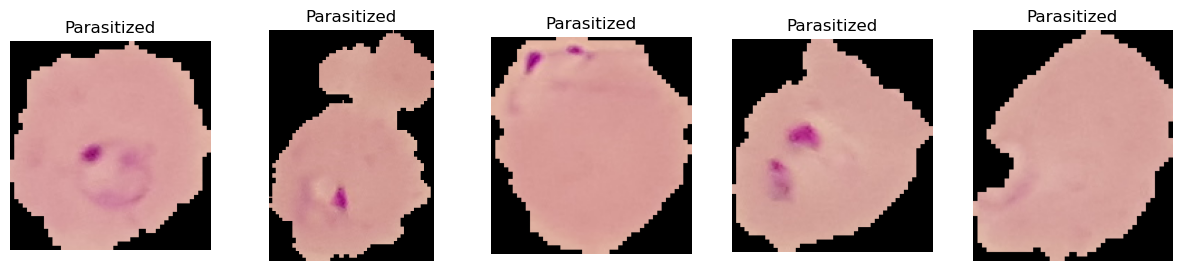

Examples from 'Uninfected' class:


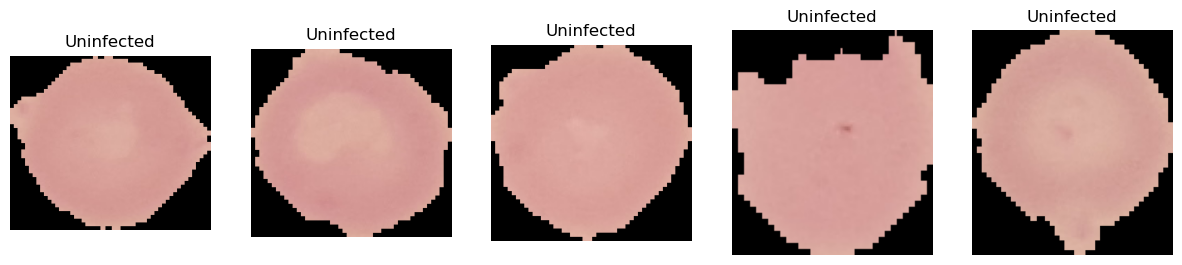

In [1]:
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define input directory
input_folder = pathlib.Path("cell_images/")

# Get lists of image files in each class directory
parasitized_files = list((input_folder / 'Parasitized').glob('*.png'))
uninfected_files = list((input_folder / 'Uninfected').glob('*.png'))

# Function to display images
def display_images(image_paths, title, num_images=5):
    plt.figure(figsize=(15, 3))
    for i, image_path in enumerate(image_paths[:num_images]):
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display examples from 'Parasitized' class
print("Examples from 'Parasitized' class:")
display_images(parasitized_files, 'Parasitized')

# Display examples from 'Uninfected' class
print("Examples from 'Uninfected' class:")
display_images(uninfected_files, 'Uninfected')


Number of 'Parasitized' images: 13779
Number of 'Uninfected' images: 13779
Percentage of 'Parasitized' images: 50.00%
Percentage of 'Uninfected' images: 50.00%


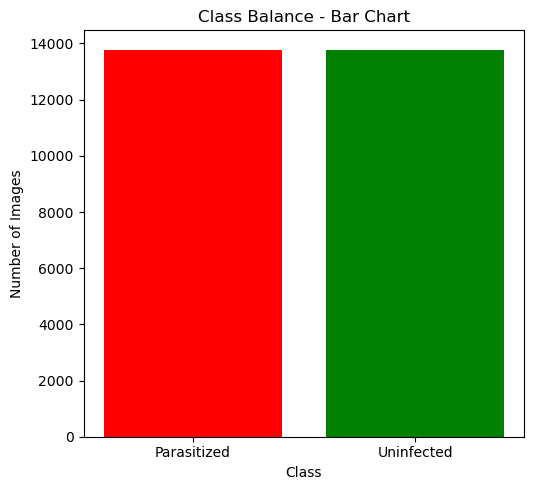

In [1]:
import pathlib
import matplotlib.pyplot as plt

# Define input directory
input_folder = pathlib.Path("cell_images/")

# Get lists of image files in each class directory
parasitized_files = list((input_folder / 'Parasitized').glob('*'))
uninfected_files = list((input_folder / 'Uninfected').glob('*'))

# Calculate the number of images in each class
num_parasitized = len(parasitized_files)
num_uninfected = len(uninfected_files)

# Print the class balance
print(f"Number of 'Parasitized' images: {num_parasitized}")
print(f"Number of 'Uninfected' images: {num_uninfected}")

total_images = num_parasitized + num_uninfected
parasitized_percentage = (num_parasitized / total_images) * 100
uninfected_percentage = (num_uninfected / total_images) * 100

print(f"Percentage of 'Parasitized' images: {parasitized_percentage:.2f}%")
print(f"Percentage of 'Uninfected' images: {uninfected_percentage:.2f}%")

# Bar chart of class balance
plt.figure(figsize=(10, 5))

# Plotting the bar chart
plt.subplot(1, 2, 1)
classes = ['Parasitized', 'Uninfected']
counts = [num_parasitized, num_uninfected]
plt.bar(classes, counts, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Balance - Bar Chart')

# Display the plots
plt.tight_layout()
plt.show()


Train - Parasitized: 9645, Uninfected: 9645
Validation - Parasitized: 2066, Uninfected: 2066
Test - Parasitized: 2068, Uninfected: 2068


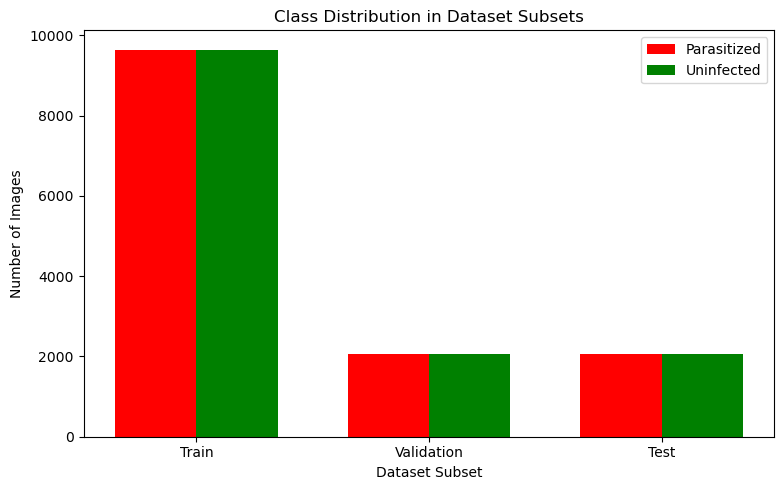

In [2]:
import pathlib
import matplotlib.pyplot as plt

# Define input directory
input_folder = pathlib.Path("split_data/")

# Function to count images in each class
def count_images(subset_folder):
    parasitized_files = list((subset_folder / 'Parasitized').glob('*'))
    uninfected_files = list((subset_folder / 'Uninfected').glob('*'))
    return len(parasitized_files), len(uninfected_files)

# Count images in each subset
train_parasitized, train_uninfected = count_images(input_folder / 'train')
val_parasitized, val_uninfected = count_images(input_folder / 'val')
test_parasitized, test_uninfected = count_images(input_folder / 'test')

# Print the number of images in each folder
print(f"Train - Parasitized: {train_parasitized}, Uninfected: {train_uninfected}")
print(f"Validation - Parasitized: {val_parasitized}, Uninfected: {val_uninfected}")
print(f"Test - Parasitized: {test_parasitized}, Uninfected: {test_uninfected}")

# Data for plotting
subsets = ['Train', 'Validation', 'Test']
parasitized_counts = [train_parasitized, val_parasitized, test_parasitized]
uninfected_counts = [train_uninfected, val_uninfected, test_uninfected]

# Plotting the bar chart
plt.figure(figsize=(15, 5))

# Bar chart for class distribution
plt.subplot(1, 2, 1)
bar_width = 0.35
index = range(len(subsets))

plt.bar(index, parasitized_counts, bar_width, label='Parasitized', color='red')
plt.bar([i + bar_width for i in index], uninfected_counts, bar_width, label='Uninfected', color='green')

plt.xlabel('Dataset Subset')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Dataset Subsets')
plt.xticks([i + bar_width / 2 for i in index], subsets)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [5]:
pip install split-folders


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pathlib
import splitfolders

# Define input and output directories
input_folder = pathlib.Path("cell_images/")
output_folder = pathlib.Path("split_data/")

# Check if the output directory already exists
if not output_folder.exists():
    # Split with a fixed ratio
    splitfolders.ratio(
        input=str(input_folder),
        output=str(output_folder),
        seed=1337,
        ratio=(0.7, 0.15, 0.15),  # 70% train, 15% val, 15% test
        group_prefix=None,
        move=False  # copy files instead of moving them
    )
    print("Dataset has been split into train, val, and test sets.")
else:
    print("The split_data directory already exists. No splitting performed.")


Copying files: 27558 files [02:52, 159.97 files/s]

Dataset has been split into train, val, and test sets.
